# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     --- --------------------------------- 71.7/675.6 kB 991.0 kB/s eta 0:00:01
     ------------- ------------------------ 235.5/675.6 kB 2.1 MB/s eta 0:00:01
     --------------------- ---------------- 389.1/675.6 kB 2.4 MB/s eta 0:00:01
     ----------------------------- -------- 532.5/675.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=c674fe8ab38a37cbb5769f3b08dbb0efb38f285f6c6abfc940f4b1dd4c407370
  Stored in directory: c:\users\12243\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to u

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

weather_api_key = "a621a94c1be4036303d575da82f3b78c"


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 621
['sao vicente', 'beni mellal', 'vadso', 'college', 'invercargill', 'port-aux-francais', 'isafjordur', 'grytviken', 'verdal', 'albany', 'graham', 'kontagora', 'bethel', 'hawaiian paradise park', 'hachinohe', 'waitangi', 'windhoek', 'tiksi', 'edinburgh of the seven seas', 'arraial do cabo', 'alo', 'iqaluit', 'hopelchen', 'taiohae', 'atafu village', 'pesaro', 'tual', 'natal', 'awjilah', 'adamstown', 'aasiaat', 'fale old settlement', 'pathein', 'manatutu', 'stanley', 'langsa', 'thompson', 'shingu', 'jalai nur', 'weno', 'lebu', 'vernon', 'klyuchi', 'port macquarie', 'anadyr', 'jutai', 'supe', 'acapulco de juarez', 'kodiak', 'fort st. john', 'cabo san lucas', 'olyokminsk', 'colonia', 'goz beida', 'solnechnyy', 'margaret river', 'port mathurin', "ust'-kut", 'chittarkonda', 'sungailiat', 'vorgashor', 'queenstown', 'yellowknife', 'bredasdorp', 'bhawana', 'jamestown', 'port elizabeth', 'urucara', 'puerto el triunfo', 'bilibino', 'vilyuchinsk', 'san juan de miraf

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

     # Get city weather response
    city_response = requests.get(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']
       

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao vicente
Processing Record 2 of Set 1 | beni mellal
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | verdal
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | graham
Processing Record 12 of Set 1 | kontagora
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | hachinohe
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | windhoek
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | alo
Processing Record 22 of Set 1 | iqaluit
Proc

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     sao vicente -23.9631  -46.3919     23.57        66           0   
1     beni mellal  32.3373   -6.3498     22.64        33          18   
2           vadso  70.0744   29.7487     10.09        93          75   
3         college  64.8569 -147.8028      6.99        87          75   
4    invercargill -46.4000  168.3500      9.45        85         100   
..            ...      ...       ...       ...       ...         ...   
591      luderitz -26.6481   15.1594     14.31        53          96   
592        esquel -42.9000  -71.3167     -0.15        84         100   
593         la'ie  21.6477 -157.9253     27.66        75          50   
594     rio claro -22.4114  -47.5614     22.87        33           0   
595       quellon -43.1167  -73.6167      3.37        87          35   

     Wind Speed Country        Date  
0          0.75      BR  1727323687  
1          0.65      MA  1727323688  
2          1.03      

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao vicente,-23.9631,-46.3919,23.57,66,0,0.75,BR,1727323687
1,beni mellal,32.3373,-6.3498,22.64,33,18,0.65,MA,1727323688
2,vadso,70.0744,29.7487,10.09,93,75,1.03,NO,1727323688
3,college,64.8569,-147.8028,6.99,87,75,2.57,US,1727323688
4,invercargill,-46.4000,168.3500,9.45,85,100,2.68,NZ,1727323416


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao vicente,-23.9631,-46.3919,23.57,66,0,0.75,BR,1727323687
1,beni mellal,32.3373,-6.3498,22.64,33,18,0.65,MA,1727323688
2,vadso,70.0744,29.7487,10.09,93,75,1.03,NO,1727323688
3,college,64.8569,-147.8028,6.99,87,75,2.57,US,1727323688
4,invercargill,-46.4000,168.3500,9.45,85,100,2.68,NZ,1727323416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

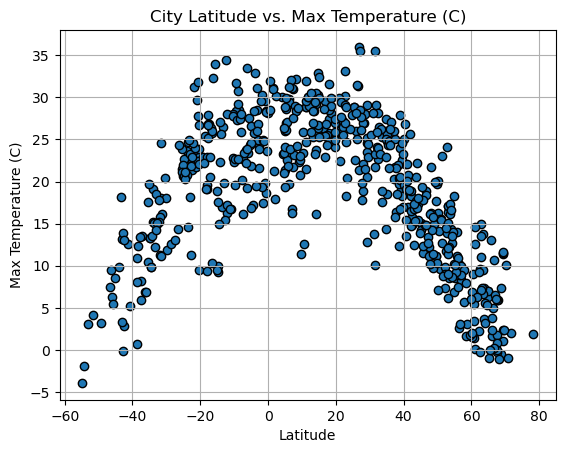

In [27]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black')
plt.title("City Latitude vs. Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

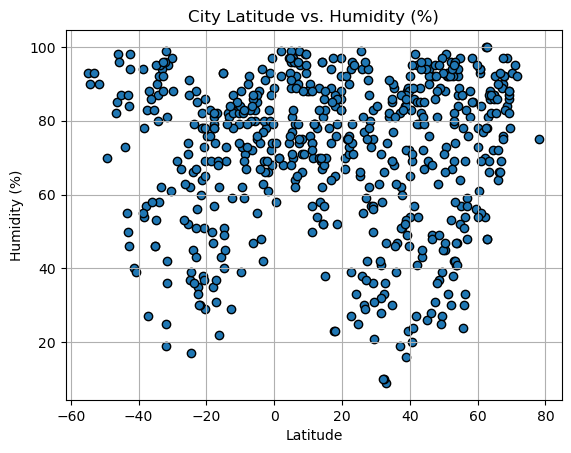

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

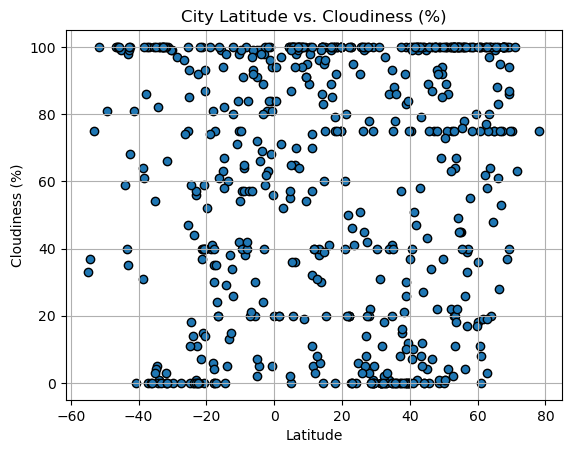

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

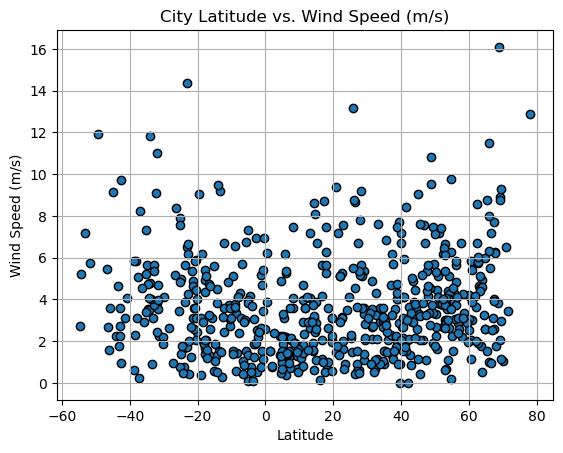

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create the regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+5, max(y_values)-10), fontsize=15, color="red")

     # Add labels, title, and grid
    plt.title(f"{hemisphere} Hemisphere - {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Show plot
    plt.show()



In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beni mellal,32.3373,-6.3498,22.64,33,18,0.65,MA,1727323688
2,vadso,70.0744,29.7487,10.09,93,75,1.03,NO,1727323688
3,college,64.8569,-147.8028,6.99,87,75,2.57,US,1727323688
6,isafjordur,66.0755,-23.1240,1.70,64,61,1.02,IS,1727323689
8,verdal,63.7933,11.4817,7.40,88,100,4.92,NO,1727323689


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao vicente,-23.9631,-46.3919,23.57,66,0,0.75,BR,1727323687
4,invercargill,-46.4000,168.3500,9.45,85,100,2.68,NZ,1727323416
5,port-aux-francais,-49.3500,70.2167,3.17,70,81,11.90,TF,1727323446
7,grytviken,-54.2811,-36.5092,-1.86,90,37,5.20,GS,1727323689
15,waitangi,-43.9535,-176.5597,9.90,73,59,2.24,NZ,1727323690


###  Temperature vs. Latitude Linear Regression Plot

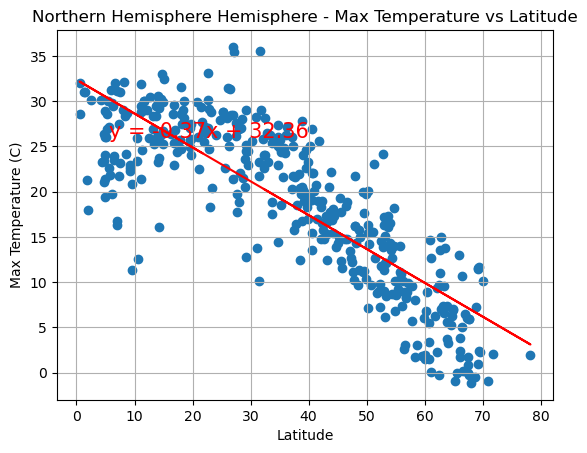

In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temperature vs Latitude", "Latitude", "Max Temperature (C)", "Northern Hemisphere" )

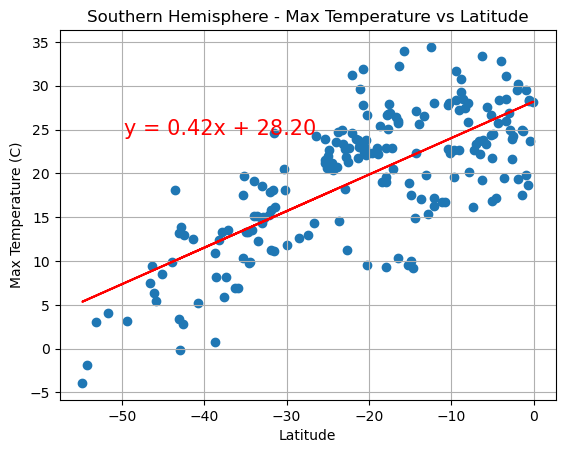

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temperature vs Latitude", "Latitude", "Max Temperature (C)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern Hemisphere
Observation: In the Northern Hemisphere, as latitude increases (i.e., moving away from the equator toward the poles), the maximum temperature decreases.

Southern Hemisphere
Observation: Similarly, in the Southern Hemisphere, maximum temperature increases as latitude decreases (i.e., moving closer to the equator).

### Humidity vs. Latitude Linear Regression Plot

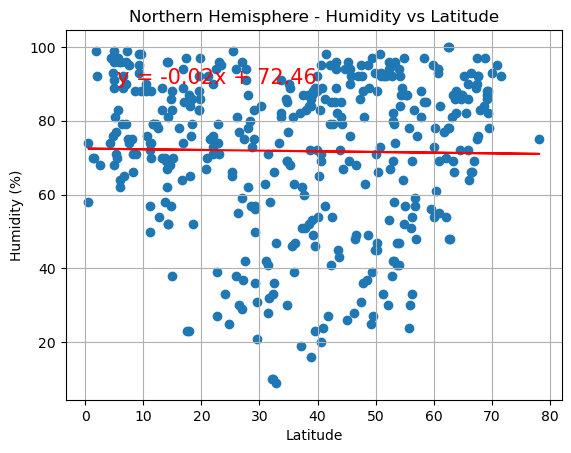

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity vs Latitude", "Latitude", "Humidity (%)", "Northern")

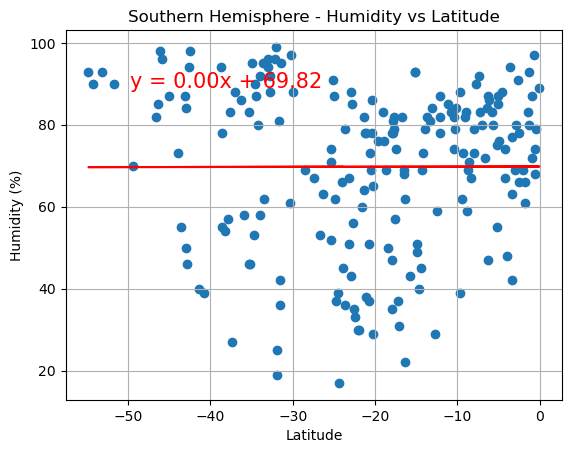

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity vs Latitude", "Latitude", "Humidity (%)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere
Observation: There is not strong, consistent trend between latitude and humidity in the Northern Hemisphere.

Southern Hemisphere
Observation: The Southern Hemisphere also shows no strong correlation between latitude and humidity, though some areas closer to the equator may have higher humidity.

### Cloudiness vs. Latitude Linear Regression Plot

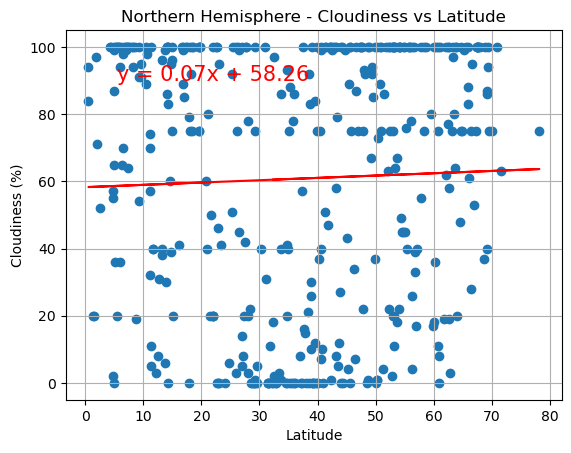

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude", "Latitude", "Cloudiness (%)", "Northern")

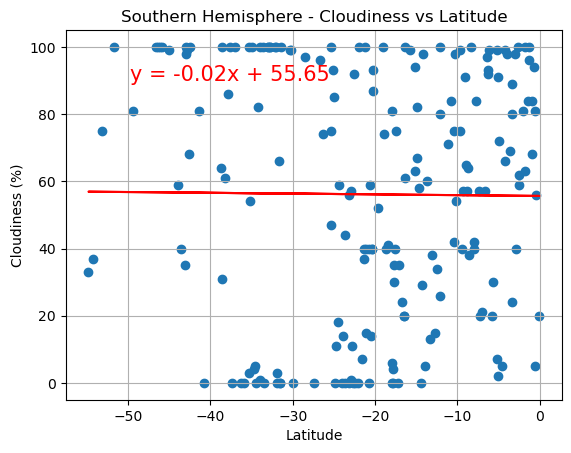

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude", "Latitude", "Cloudiness (%)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere
Observation: The plot may show considerable scatter, with no obvious trend in cloudiness as latitude increases.

Southern Hemisphere
Observation: Like the Northern Hemisphere, the Southern Hemisphere data might not exhibit a strong linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

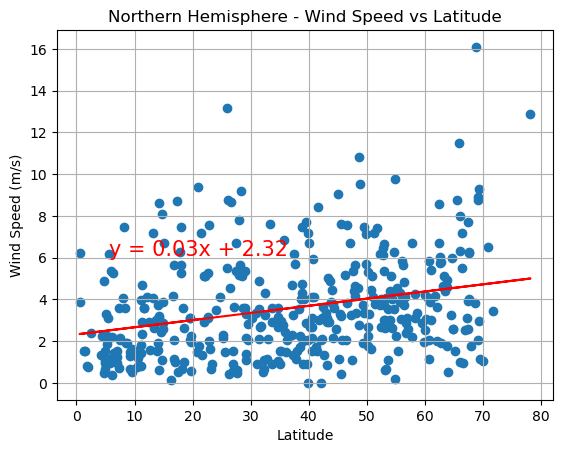

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude", "Latitude", "Wind Speed (m/s)", "Northern")

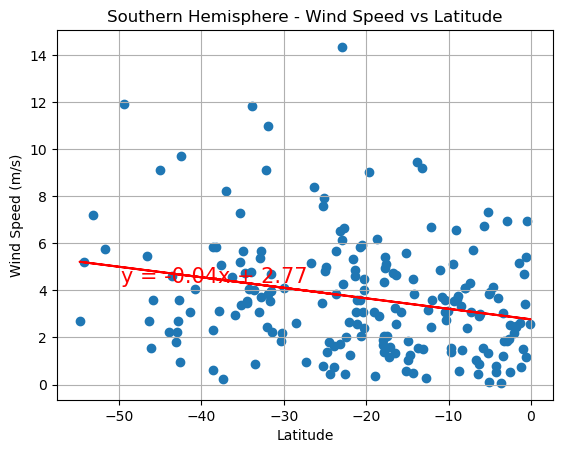

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude", "Latitude", "Wind Speed (m/s)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere
Observation: The data might show a slight trend where wind speeds are higher in regions with mid-latitude and polar regions, while wind speeds are lower near the equator.

Southern Hemisphere
Observation: Similar to the Northern Hemisphere, mid-latitude regions in the Southern Hemisphere might experience stronger winds compared to equatorial regions.